# **MARKET SEGMENTATION ON ELECTRIC CAR DATA**

# **Data preprocessing**

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch


In [2]:
# Read & loading Dataset
df = pd.read_csv("ElectricCarData_Clean.csv")
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [3]:
# Checking for null values 
df.isnull().sum()


Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [4]:
# Checking for duplicates
df.duplicated().sum()

0

In [5]:
# Data types
df.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH      object
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object

In [6]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


# **Encoding categorical variables**

In [7]:
#converting to categorical 
df['Brand'] = df['Brand'].astype('category')
df['Model'] = df['Model'].astype('category')
df['AccelSec'] = df['AccelSec'].astype('category')
df['TopSpeed_KmH'] = df['TopSpeed_KmH'].astype('category')
df['Range_Km'] = df['Range_Km'].astype('category')
df['Efficiency_WhKm'] = df['Efficiency_WhKm'].astype('category')
df['FastCharge_KmH'] = df['FastCharge_KmH'].astype('category')
df['RapidCharge'] = df['RapidCharge'].astype('category')
df['PowerTrain'] = df['PowerTrain'].astype('category')
df['PlugType'] = df['PlugType'].astype('category')
df['BodyStyle'] = df['BodyStyle'].astype('category')
df['Segment'] = df['Segment'].astype('category')
df['Seats'] = df['Seats'].astype('category')
df['PriceEuro'] = df['PriceEuro'].astype('category')
df.dtypes

Brand              category
Model              category
AccelSec           category
TopSpeed_KmH       category
Range_Km           category
Efficiency_WhKm    category
FastCharge_KmH     category
RapidCharge        category
PowerTrain         category
PlugType           category
BodyStyle          category
Segment            category
Seats              category
PriceEuro          category
dtype: object

In [8]:
#converting to numerical
df['Brand'] = df['Brand'].cat.codes
df['Model'] = df['Model'].cat.codes
df['AccelSec'] = df['AccelSec'].cat.codes
df['TopSpeed_KmH'] = df['TopSpeed_KmH'].cat.codes
df['Range_Km'] = df['Range_Km'].cat.codes
df['Efficiency_WhKm'] = df['Efficiency_WhKm'].cat.codes
df['FastCharge_KmH'] = df['FastCharge_KmH'].cat.codes
df['RapidCharge'] = df['RapidCharge'].cat.codes
df['PowerTrain'] = df['PowerTrain'].cat.codes
df['PlugType'] = df['PlugType'].cat.codes
df['BodyStyle'] = df['BodyStyle'].cat.codes
df['Segment'] = df['Segment'].cat.codes
df['Seats'] = df['Seats'].cat.codes
df['PriceEuro'] = df['PriceEuro'].cat.codes
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,30,46,11,18,42,5,50,1,0,2,7,3,2,52
1,31,33,46,9,15,9,7,1,2,2,1,2,2,11
2,23,0,12,15,35,21,36,1,0,2,2,3,2,53
3,2,101,26,12,28,32,32,1,2,2,6,3,2,64
4,9,78,41,5,4,10,2,1,2,2,1,1,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,20,6,30,9,24,25,21,1,1,2,1,2,2,43
99,1,94,10,15,25,49,30,1,0,2,6,4,2,75
100,20,8,20,14,23,27,21,1,0,2,1,2,2,47
101,20,10,16,14,31,44,22,1,0,2,1,2,2,61


In [9]:
# Descriptive statistics
df.describe()


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,18.058252,50.864078,28.077670,10.495146,24.854369,22.009709,20.601942,0.951456,0.844660,1.922330,4.077670,2.621359,1.902913,42.194175
std,10.546652,29.674393,14.629201,6.043752,13.034951,14.074379,14.110447,0.215963,0.789108,0.388292,2.515401,1.698422,0.734507,23.987766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.500000,25.500000,16.000000,6.000000,13.000000,10.000000,8.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2.000000,22.500000
50%,20.000000,51.000000,29.000000,9.000000,26.000000,20.000000,21.000000,1.000000,1.000000,2.000000,6.000000,2.000000,2.000000,43.000000
75%,27.500000,76.500000,40.000000,14.000000,35.000000,31.500000,31.500000,1.000000,1.000000,2.000000,6.000000,4.000000,2.000000,61.000000
max,32.000000,101.000000,54.000000,24.000000,49.000000,53.000000,50.000000,1.000000,2.000000,3.000000,8.000000,7.000000,4.000000,86.000000


# Data visualization

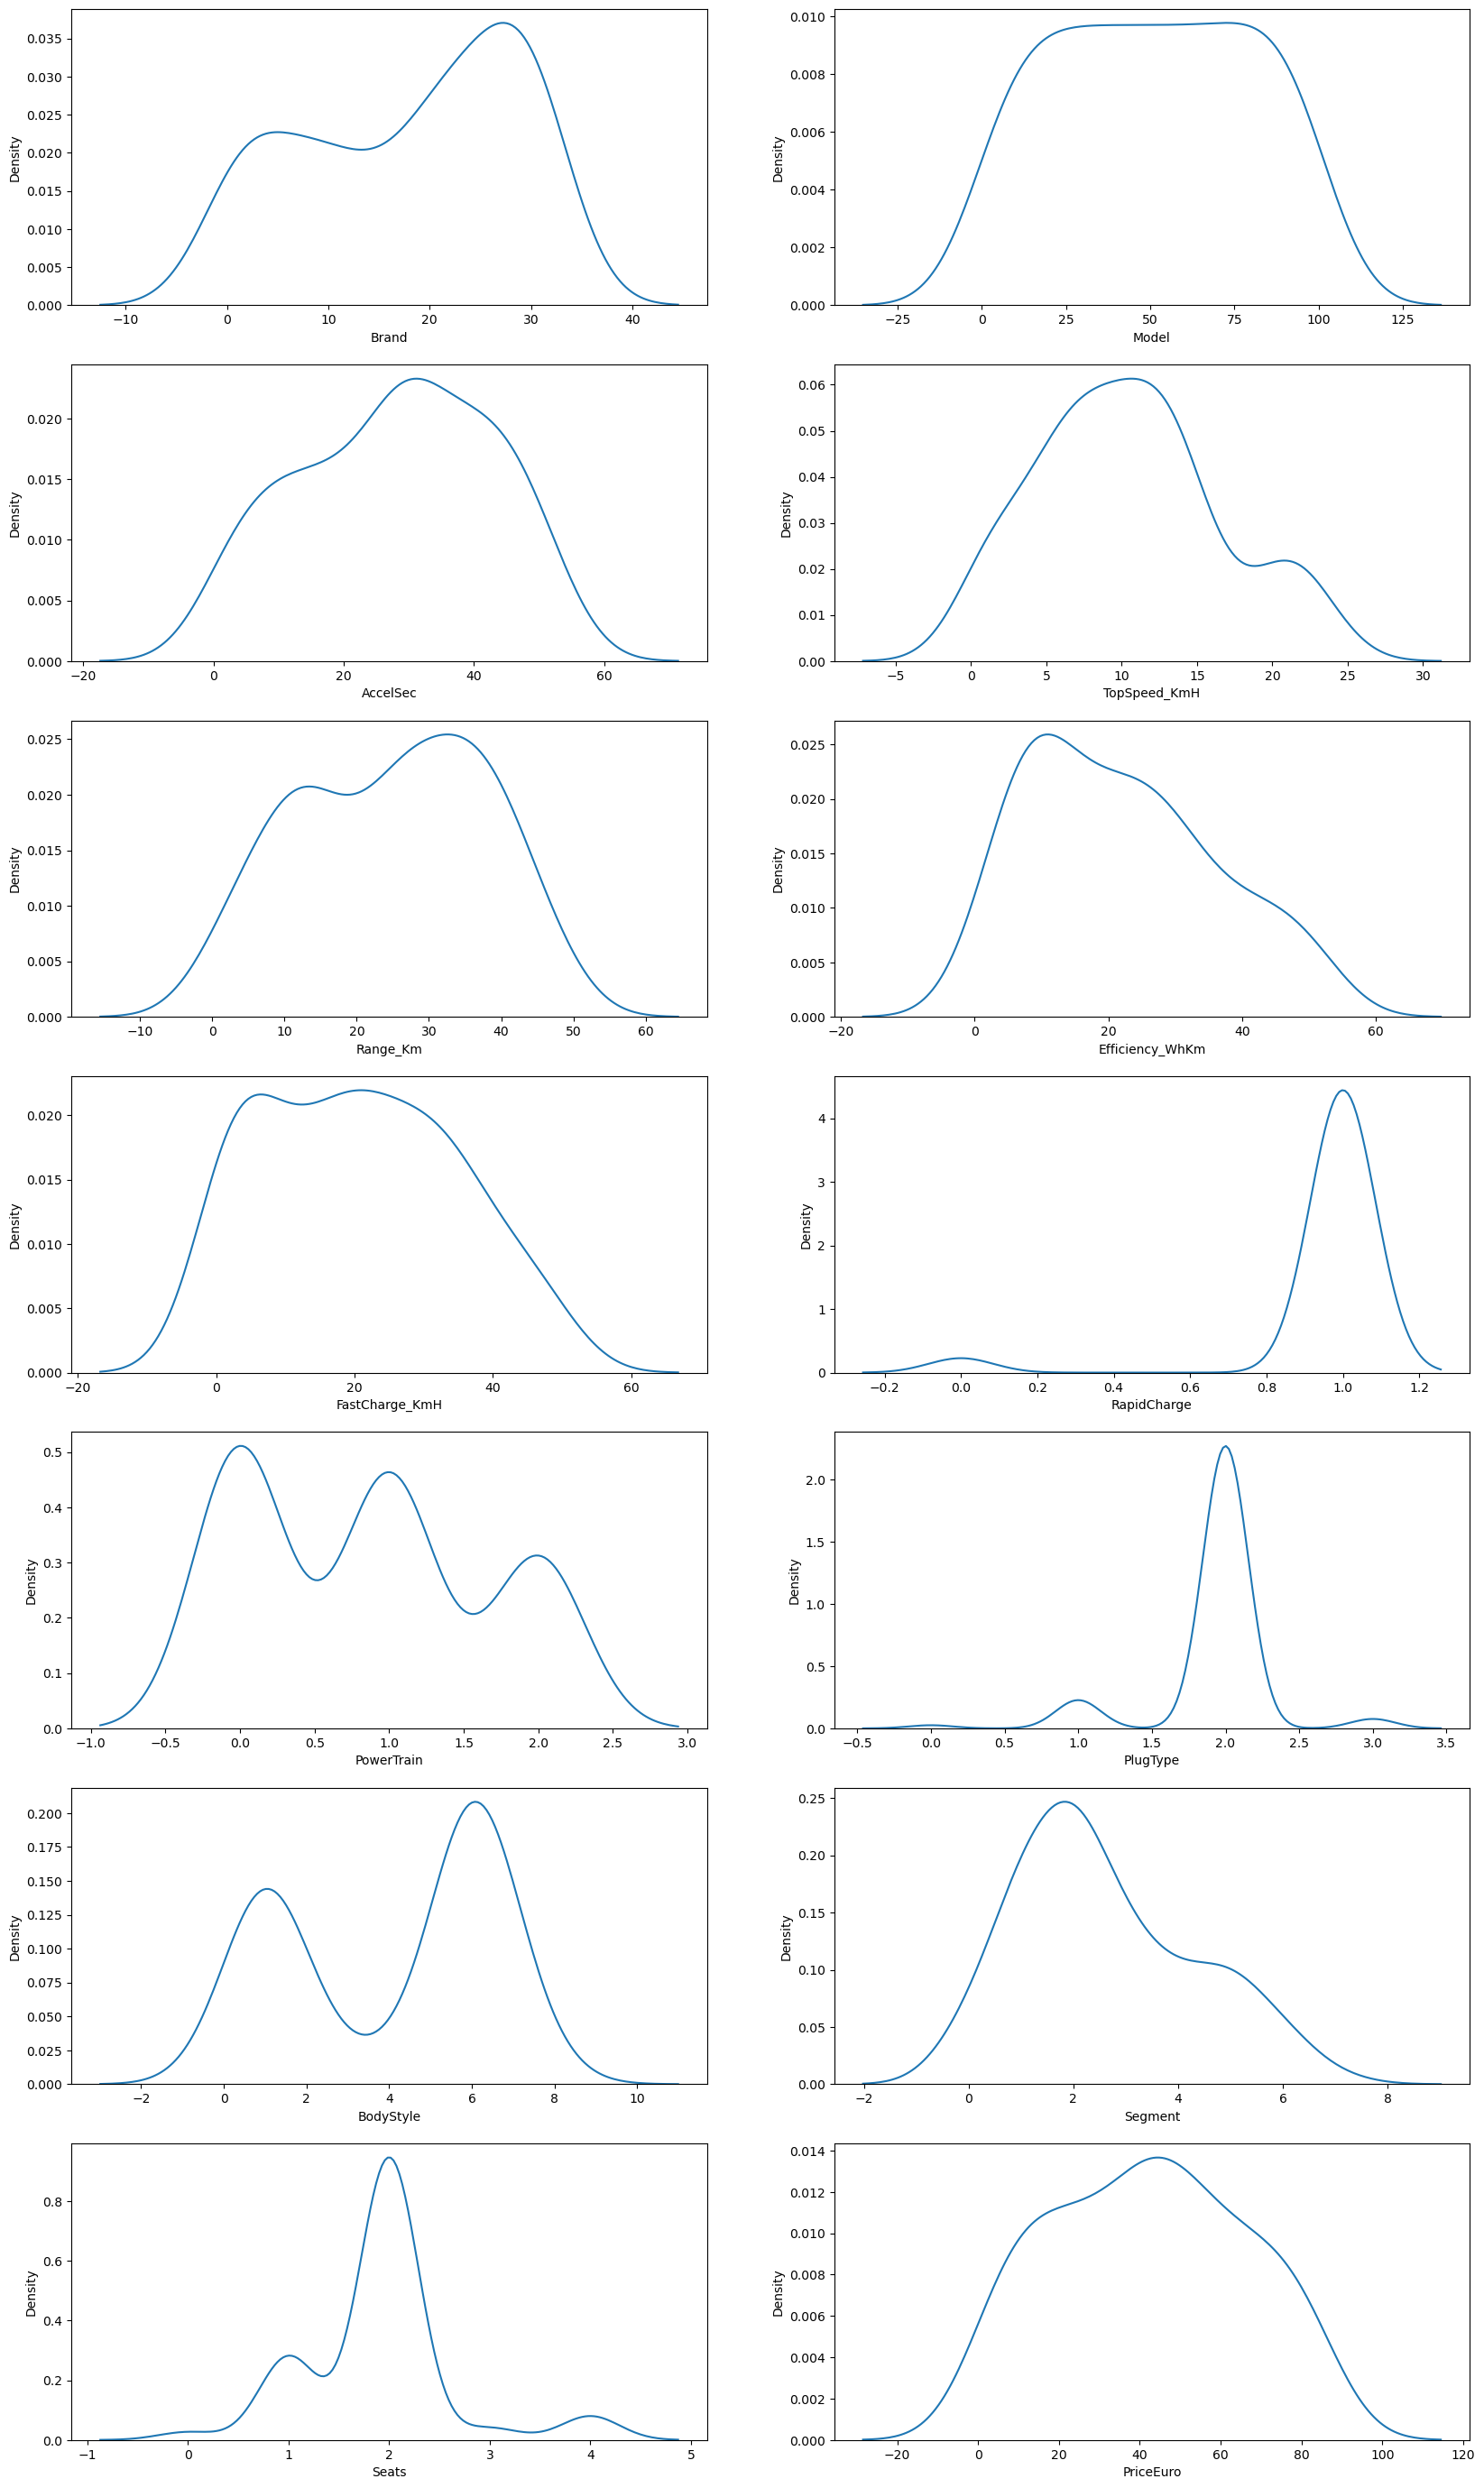

In [10]:
# Density plots for numerical attributes
plt.figure(figsize=(20, 35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(7, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
plt.show()

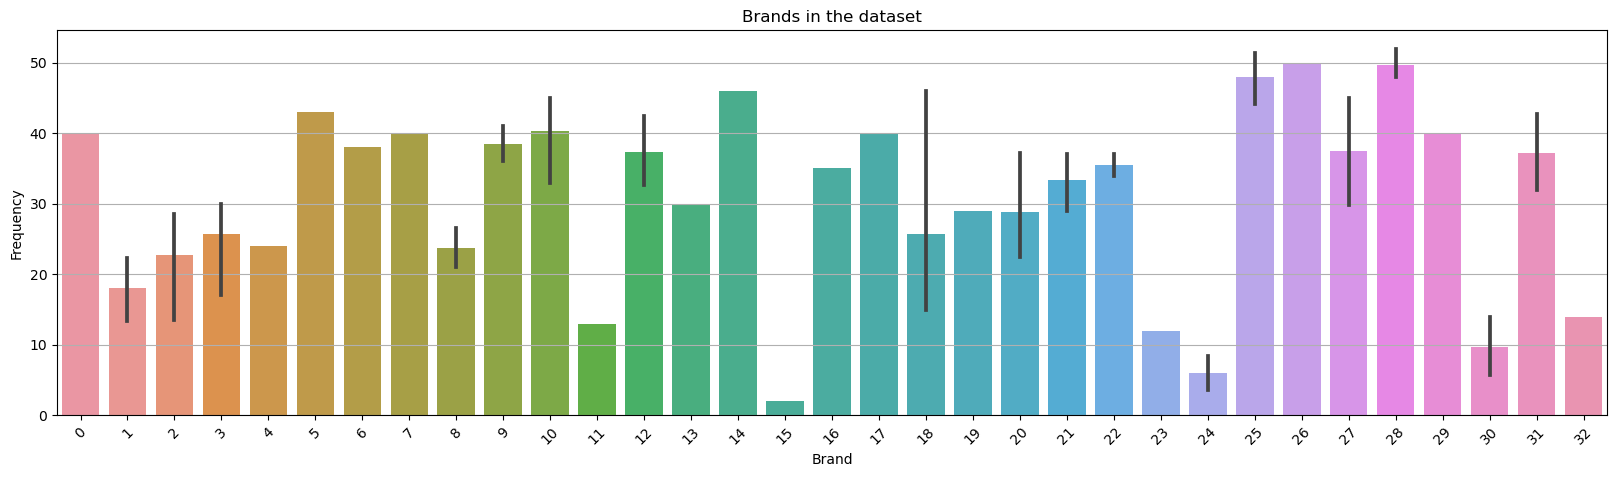

In [11]:
# Bar plot for brand frequency
plt.figure(figsize=(20, 5))
sns.barplot(x='Brand', y='AccelSec', data=df)
plt.grid(axis='y')
plt.title('Brands in the dataset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


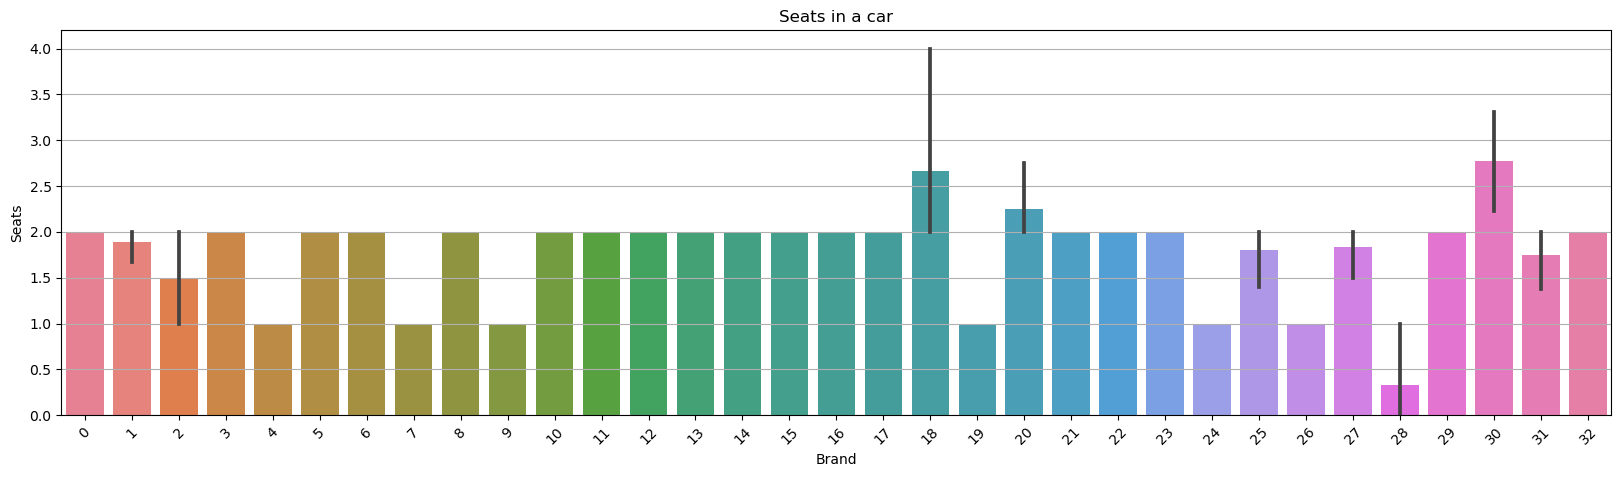

In [12]:
# Bar plot for number of seats
plt.figure(figsize=(20, 5))
sns.barplot(x='Brand', y='Seats', data=df, palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)
plt.show()

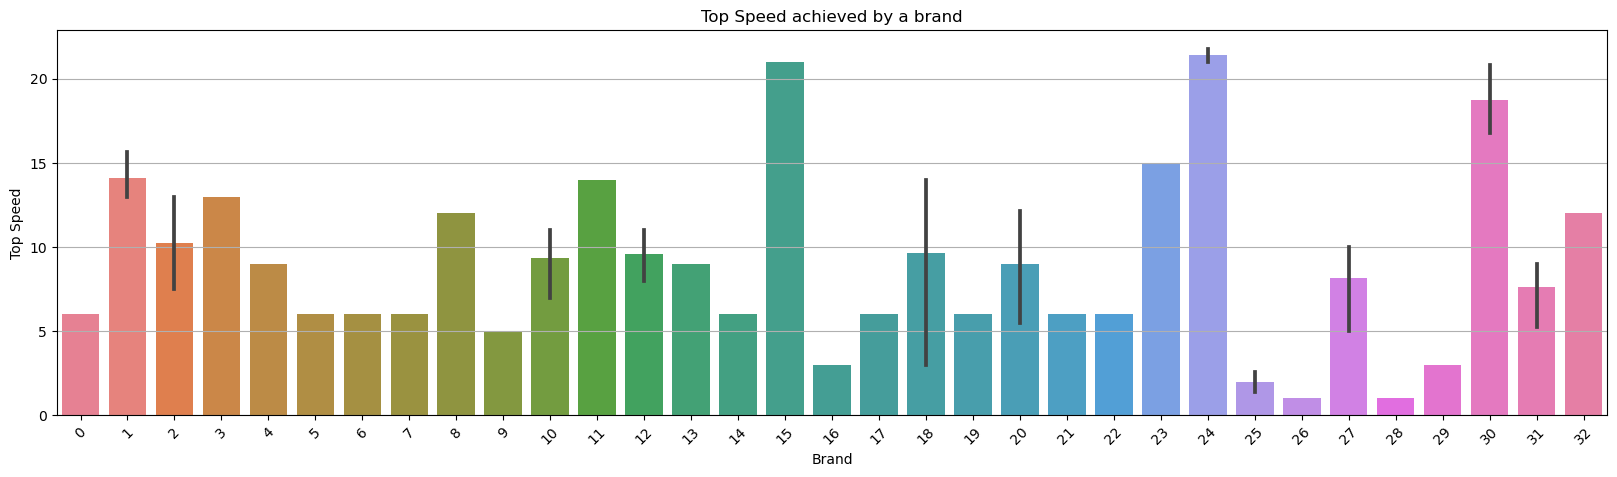

In [13]:
# Bar plot for top speeds achieved by brands
plt.figure(figsize=(20, 5))
sns.barplot(x='Brand', y='TopSpeed_KmH', data=df, palette='husl')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)
plt.show()

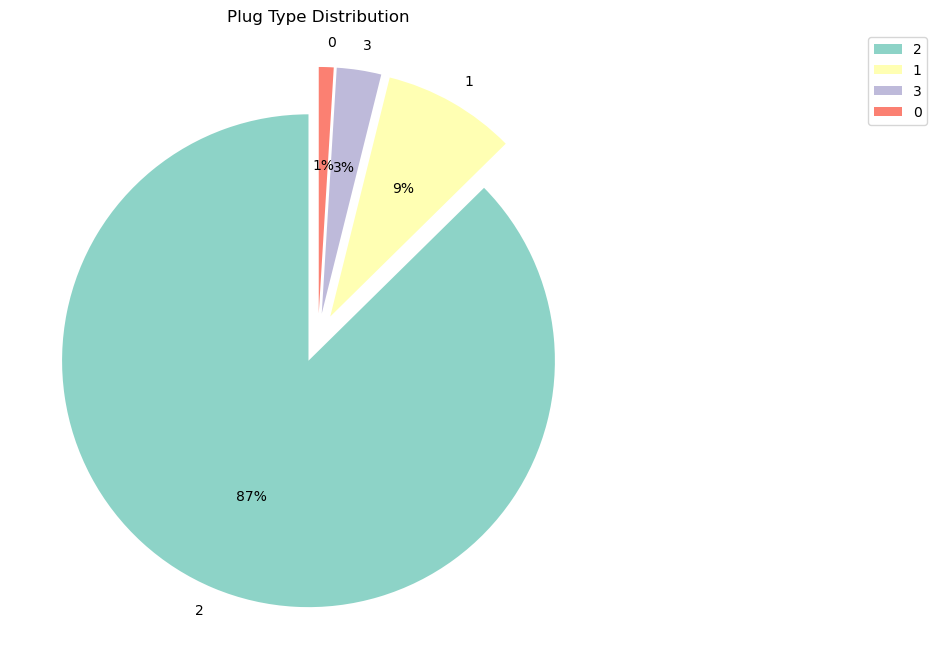

In [14]:
# Pie chart for Plug Type distribution
plt.figure(figsize=(8, 8))
colors = sns.color_palette('Set3')
explode = (0.1, 0.1, 0.1, 0.1)
plug_type_counts = df['PlugType'].value_counts()

plt.pie(plug_type_counts, labels=plug_type_counts.index, autopct='%1.0f%%', startangle=90, colors=colors, explode=explode)
plt.title('Plug Type Distribution')
plt.legend(plug_type_counts.index, loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


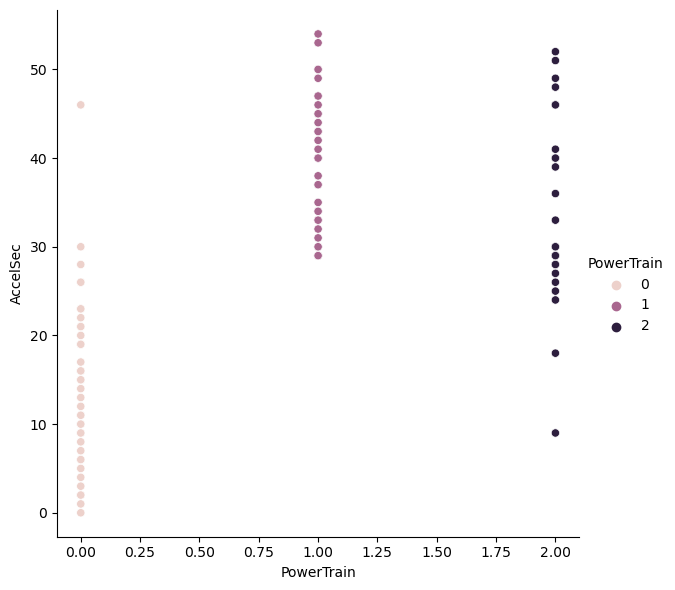

In [15]:
# Scatter plot for PowerTrain vs. Acceleration time
sns.relplot(x="PowerTrain", y="AccelSec", height=6, hue="PowerTrain", data=df)
plt.show()

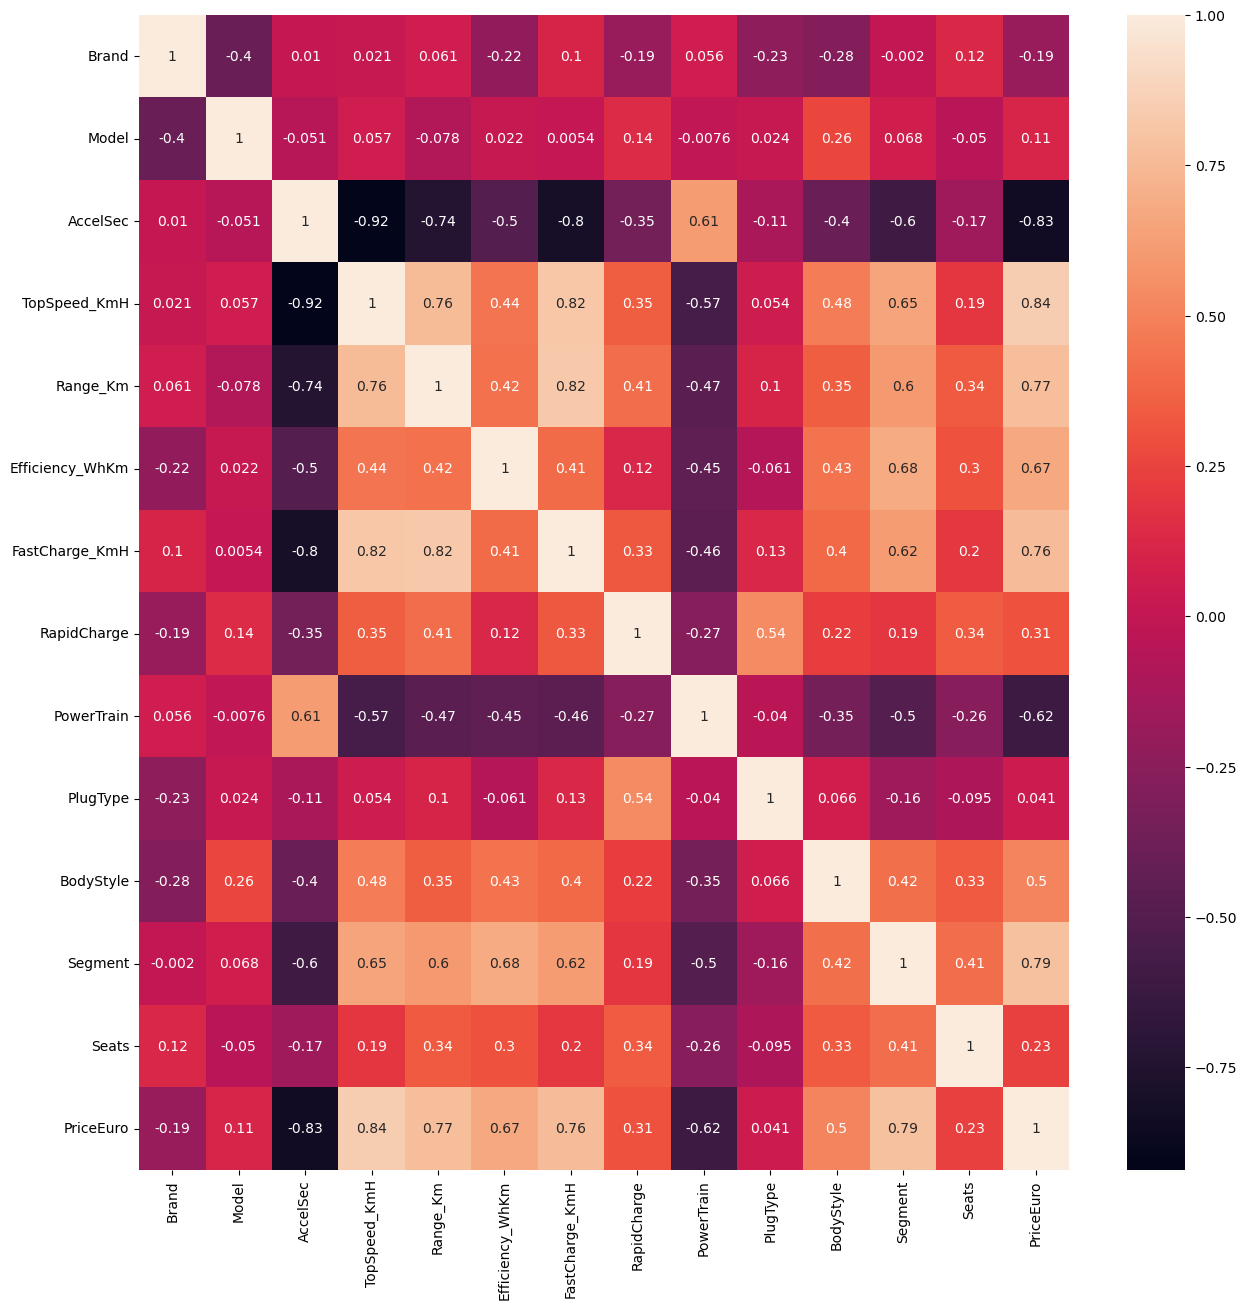

In [16]:
# Correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)
plt.show()

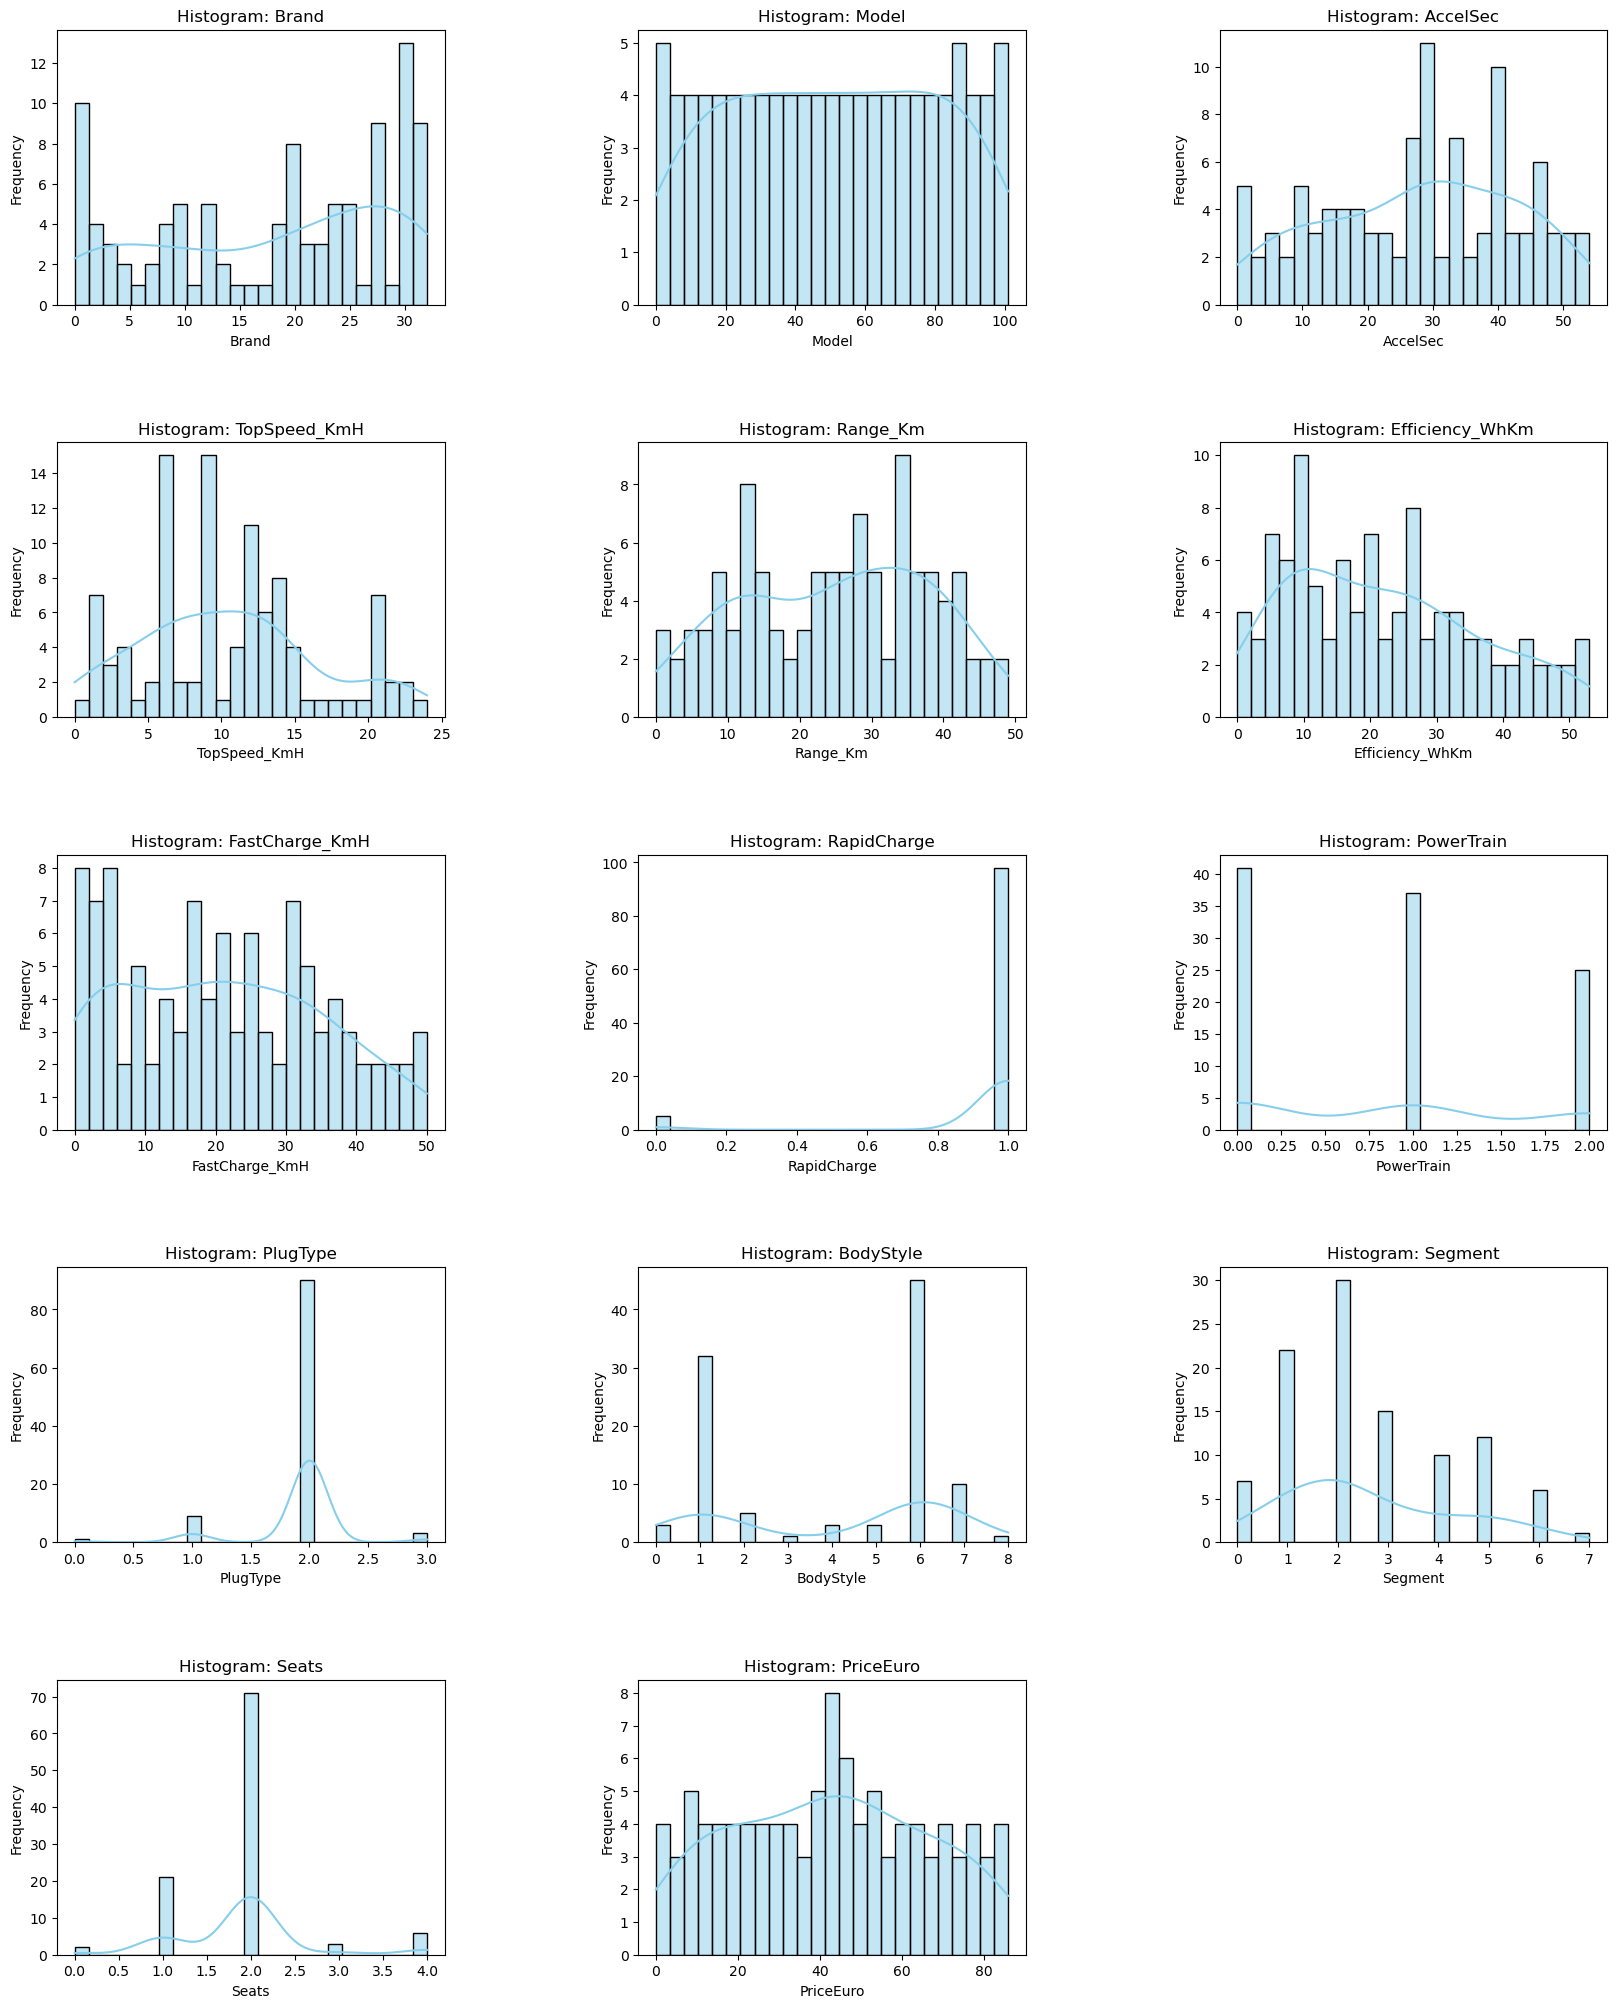

In [17]:
# Histograms for all attributes
plt.figure(figsize=(20, 25))
for i, attribute in enumerate(df.columns):
    plt.subplot(5, 3, i+1)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[attribute], bins=25, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram: {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
plt.show()


C:\Users\santhoshini\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


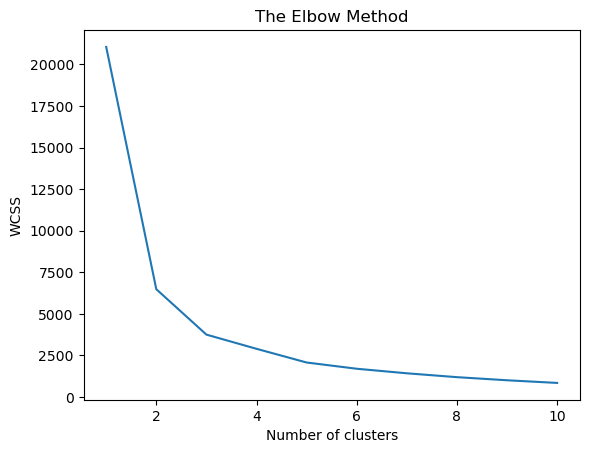

In [18]:
# K-Means clustering
X = df.iloc[:, [3, 4]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

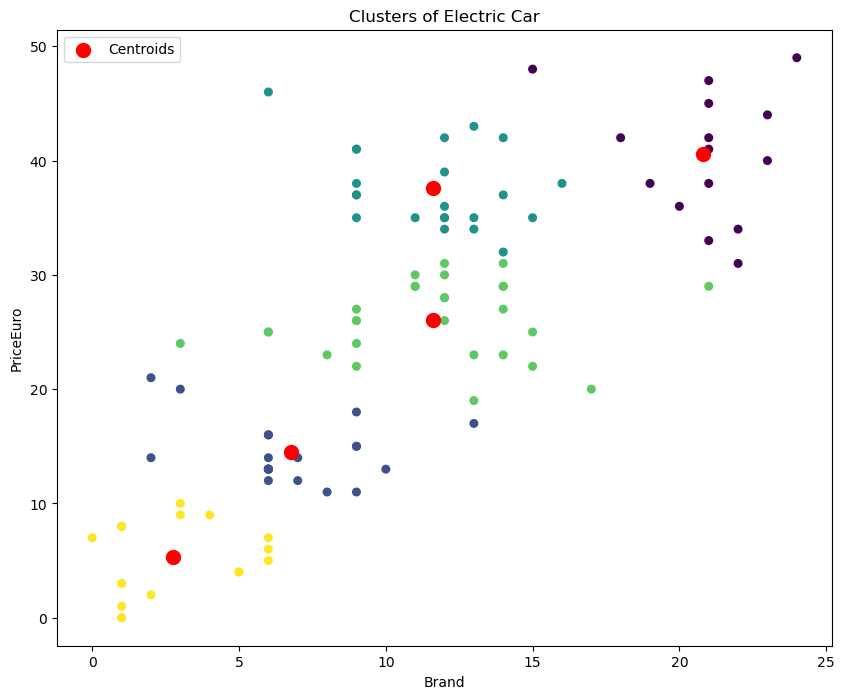

In [19]:
# Create a DataFrame with cluster information
df_clusters = pd.DataFrame({'Brand': X[:, 0], 'PriceEuro': X[:, 1], 'Cluster': y_kmeans})

# Visualizing clusters using Matplotlib scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df_clusters['Brand'], df_clusters['PriceEuro'], c=df_clusters['Cluster'], cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('Clusters of Electric Car')
plt.xlabel('Brand')
plt.ylabel('PriceEuro')
plt.legend()
plt.show()


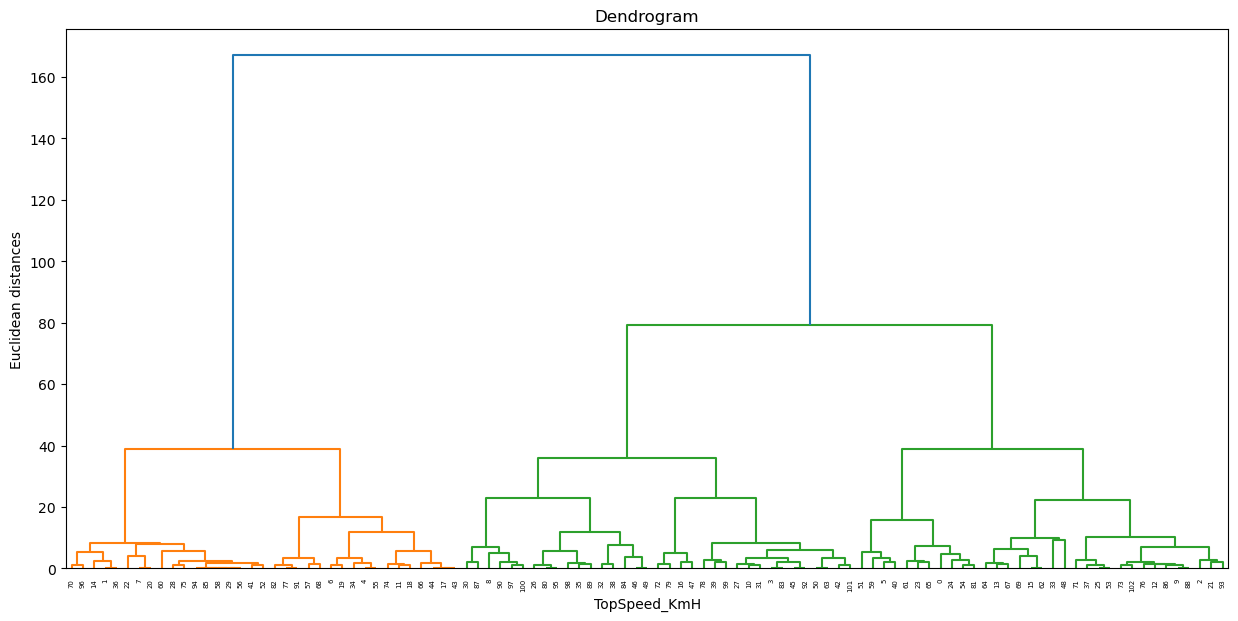

In [20]:
# Dendrogram for hierarchical clustering
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('TopSpeed_KmH')
plt.ylabel('Euclidean distances')
plt.show()